In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Fertile_Man_2020.csv')

In [5]:
df

,PI,Semen Volume (ml),Sperm Concentration (106/ml),Total Number (106),Total Motility (%),Progressive Motility (%),Non-progressive Motility (%),Immotile Spermatozoa (%),Vitality (%),Normal Forms (%)
0,Aboutorabi,3.2,27.0,86.4,35,20,15,65,NO RESULT,NO RESULT
1,Aboutorabi,0.8,136.0,108.8,47,35,12,53,NO RESULT,NO RESULT
2,Aboutorabi,2.0,71.0,142.0,49,42,7,51,NO RESULT,NO RESULT
3,Aboutorabi,1.0,35.0,35.0,50,28,22,50,NO RESULT,NO RESULT
4,Aboutorabi,2.0,46.0,92.0,51,28,33,49,NO RESULT,NO RESULT
...,...,...,...,...,...,...,...,...,...,...
3584,Tang,1.7,23.0,39.1,53,52,1,NO RESULT,82,25
3585,Tang,2.5,110.0,275.0,66,66,0,NO RESULT,95,30
3586,Tang,2.0,109.0,218.0,64,44,20,36,NO RESULT,11
3587,Tang,6.2,96.0,595.2,39,29,10,61,NO RESULT,7


In [6]:
df1 = df.corr()

In [7]:
df1.shape

(0, 0)

In [8]:
df.describe()

,PI,Semen Volume (ml),Sperm Concentration (106/ml),Total Number (106),Total Motility (%),Progressive Motility (%),Non-progressive Motility (%),Immotile Spermatozoa (%),Vitality (%),Normal Forms (%)
count,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589
unique,10,97,644,1652,88,91,52,85,66,67
top,Tang,3.0,25.0,90.0,60,NO RESULT,5,NO RESULT,NO RESULT,NO RESULT
freq,1200,311,68,39,163,200,289,789,2252,254


In [9]:
df.keys()

Index(['PI', 'Semen Volume (ml)', 'Sperm Concentration (106/ml)',
       'Total Number (106)', 'Total Motility (%)', 'Progressive Motility (%)',
       'Non-progressive Motility (%)', 'Immotile Spermatozoa (%)',
       'Vitality (%)', 'Normal Forms (%)'],
      dtype='object')

In [10]:
df.dtypes

PI                              object
Semen Volume (ml)               object
Sperm Concentration (106/ml)    object
Total Number (106)              object
Total Motility (%)              object
Progressive Motility (%)        object
Non-progressive Motility (%)    object
Immotile Spermatozoa (%)        object
Vitality (%)                    object
Normal Forms (%)                object
dtype: object

In [11]:
df.isnull().sum()

PI                              0
Semen Volume (ml)               0
Sperm Concentration (106/ml)    0
Total Number (106)              0
Total Motility (%)              0
Progressive Motility (%)        0
Non-progressive Motility (%)    0
Immotile Spermatozoa (%)        0
Vitality (%)                    0
Normal Forms (%)                0
dtype: int64

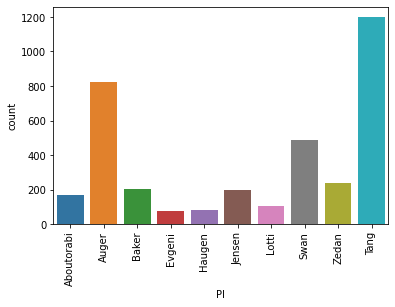

In [13]:
sns.countplot(x='PI', data=df)
plt.xticks(rotation=90)
plt.show()



In [16]:
numeric_columns = ['Semen Volume (ml)', 'Sperm Concentration (106/ml)', 'Total Number (106)',
                   'Total Motility (%)', 'Progressive Motility (%)', 'Non-progressive Motility (%)',
                   'Immotile Spermatozoa (%)', 'Vitality (%)', 'Normal Forms (%)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [18]:
df.dtypes

PI                               object
Semen Volume (ml)               float64
Sperm Concentration (106/ml)    float64
Total Number (106)              float64
Total Motility (%)              float64
Progressive Motility (%)        float64
Non-progressive Motility (%)    float64
Immotile Spermatozoa (%)        float64
Vitality (%)                    float64
Normal Forms (%)                float64
dtype: object

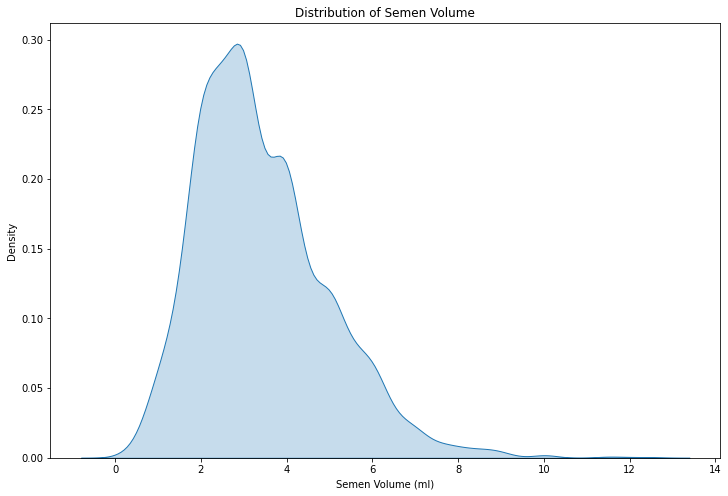

In [19]:
#This is distribution plot of semen volume.
plt.figure(figsize=(12, 8))
sns.kdeplot(df['Semen Volume (ml)'], shade=True)
plt.xlabel('Semen Volume (ml)')
plt.ylabel('Density')
plt.title('Distribution of Semen Volume')
plt.show()

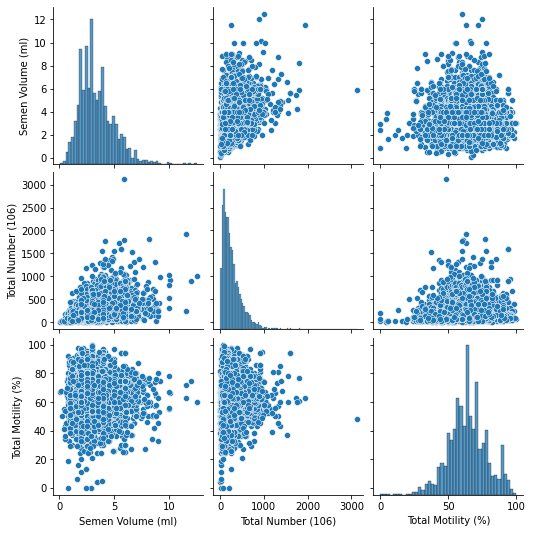

In [20]:
# pair plot for 'Semen Volume (ml)', 'Total Number (106)', and 'Total Motility (%)' 
sns.pairplot(df[['Semen Volume (ml)', 'Total Number (106)', 'Total Motility (%)']])
plt.show()

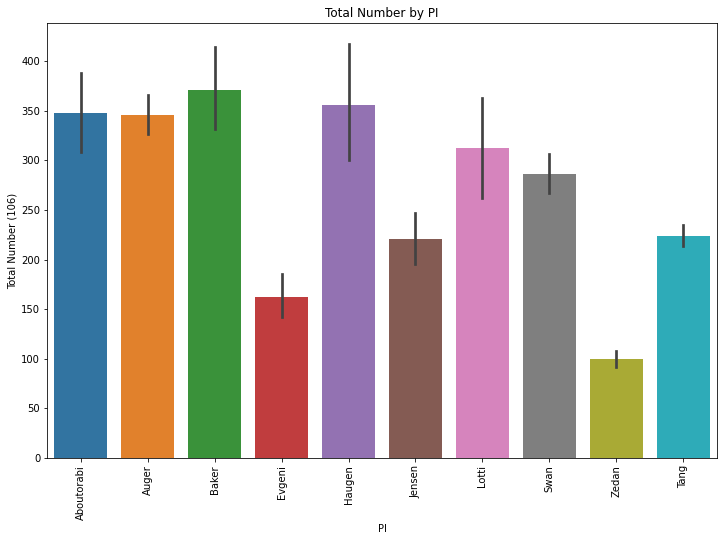

In [21]:
# bar graph of number of PI
plt.figure(figsize=(12, 8))
sns.barplot(x='PI', y='Total Number (106)', data=df)
plt.xlabel('PI')
plt.ylabel('Total Number (106)')
plt.title('Total Number by PI')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Grouped analysis
grouped_df = df.groupby('PI').mean()
grouped_df

,Semen Volume (ml),Sperm Concentration (106/ml),Total Number (106),Total Motility (%),Progressive Motility (%),Non-progressive Motility (%),Immotile Spermatozoa (%),Vitality (%),Normal Forms (%)
PI,,,,,,,,,
Aboutorabi,2.495238,140.214286,347.717262,77.148810,48.327381,29.035714,22.916667,NaN,NaN
Auger,4.048184,90.900726,345.941889,62.854722,53.696126,9.169697,36.997579,NaN,19.715054
Baker,3.740777,110.181553,370.576699,58.917476,53.009709,5.936585,40.795122,NaN,16.504854
Evgeni,3.586842,49.953947,162.822368,63.750000,48.960526,14.789474,36.289474,75.881579,8.223684
Haugen,3.937805,94.047561,355.815854,65.085366,53.573171,11.512195,34.939024,NaN,13.850000
Jensen,3.127638,76.221608,220.396482,52.676768,NaN,NaN,47.310000,NaN,41.120603
Lotti,3.627619,94.069524,312.148571,66.038095,56.485714,9.371429,34.361905,77.266667,7.647619
Swan,3.855165,77.102268,286.166598,58.051440,54.532922,3.518519,41.950617,NaN,10.975258
Tang,2.987500,76.675000,223.469750,68.125833,55.049167,13.090833,38.082031,78.570961,15.970833


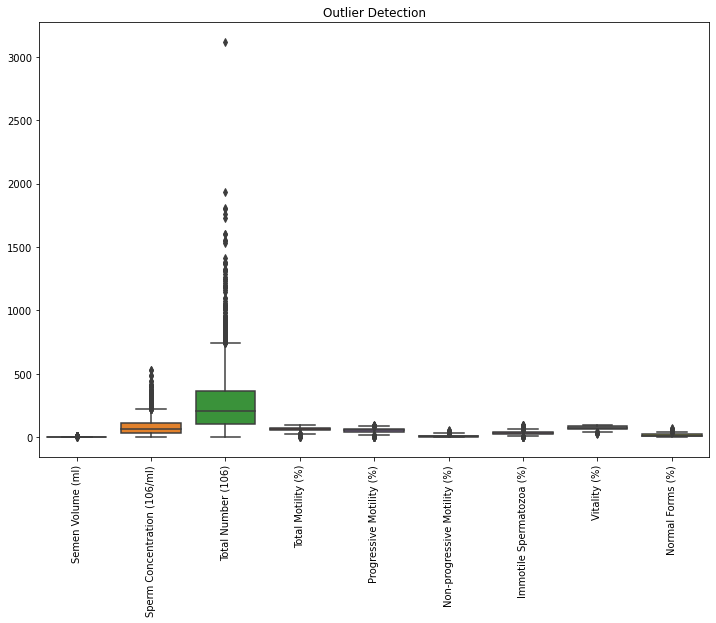

In [24]:
# Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Outlier Detection')
plt.show()